In [1]:
from dataload import loader
from lenet import train_lenet
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
EPOCHS = 10
DATA_SHAPE_MODEL = (212,212,3)
DATA_SHAPE_LOADER = (212,212)
N_CLASSES = 2
BATCH_SIZE = 32
DROP_OUT = 0.1

loader = loader.DataLoader(train_samples=512,test_samples=112,n_classes= N_CLASSES ,data_shape = DATA_SHAPE_LOADER)
x_train,y_train = loader.load_train()
x_test, y_test = loader.load_test()

100%|██████████| 112/112 [00:00<00:00, 1110548.58it/s]


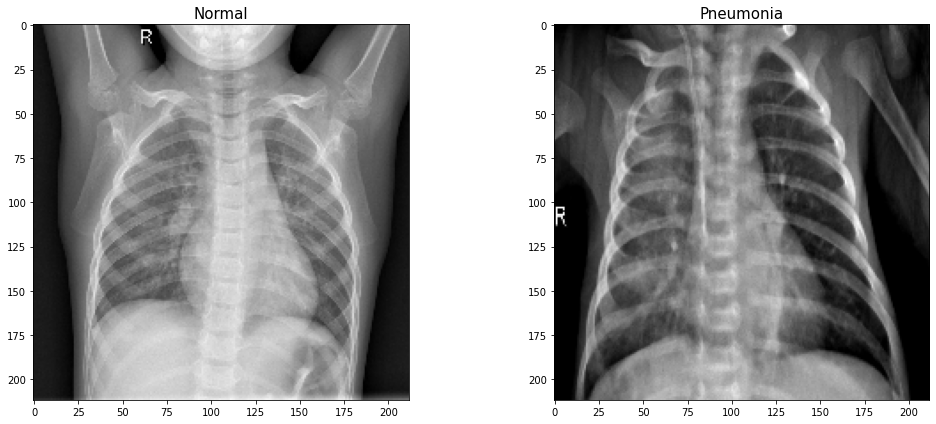

In [3]:
f, ax = plt.subplots(1,2,figsize=(15,6))

data_normal = cv2.resize(cv2.imread('0data/train/NORMAL/IM-0115-0001.jpeg'),DATA_SHAPE_LOADER)
data_pneumo = cv2.resize(cv2.imread('0data/train/PNEUMONIA/person10_bacteria_43.jpeg'),DATA_SHAPE_LOADER)

ax[0].imshow(data_normal)
ax[0].set_title('Normal',size=15)
ax[1].imshow(data_pneumo)
ax[1].set_title('Pneumonia',size=15)

plt.tight_layout()

In [4]:
le = train_lenet.MyLeNet(input_shape = DATA_SHAPE_MODEL ,n_classes = N_CLASSES,
               dropout= DROP_OUT, epochs= EPOCHS,
               x_train= x_train, y_train = y_train,
               x_test = x_test, y_test = y_test,
               batch_size = BATCH_SIZE,verbose=0)

In [5]:
history = le.train()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 210, 210, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 208, 208, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 104, 104, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 104, 104, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 692224)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               88604800  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [20]:
history.get_weights()[0][0].shape

(3, 3, 32)

In [ ]:
get_weights